In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
dataceite = pd.read_csv('Assignment_2.csv')

Sorry Jonas my code is very messy I got lost on the way. I wanted to try a veersion different from what you showed us on Github and I got lost while doing both versions. The first one seemed to work but I guess did not and for the last plot I used your version entirely but I'm not sure it was the right way to do it either.

In [3]:
dataceite.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [4]:
dataceite

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,http://mashable.com/2013/09/25/parkinsons-spoon/,9,342,9,0,4.628655,0,0,0,...,0,0,0,0,0.448753,0.250524,0.642857,0.214286,8500,3.929419
24995,24996,http://mashable.com/2013/05/20/esquire-weekly-...,6,243,1,0,5.111111,0,0,1,...,0,0,0,0,0.418081,0.206035,0.000000,0.000000,675,2.829304
24996,24997,http://mashable.com/2014/07/13/google-world-cu...,11,1334,4,4,4.613943,0,1,0,...,0,0,1,1,0.486041,0.102557,0.288889,-0.155556,1500,3.176091
24997,24998,http://mashable.com/2013/01/17/thinkpad-chrome...,7,263,1,0,4.749049,0,0,0,...,0,0,0,0,0.627143,0.387381,0.000000,0.000000,817,2.912222


Now some codes just to see what are the different values in the columns to see which variables I'm going to use for this exercise.

In [21]:
dataceite.sort_values('num_videos', ascending= False)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
361,362,http://mashable.com/2014/01/31/sponsors-politi...,10,1006,1,75,5.092445,0,0,1,...,1,0,0,0,0.507814,0.274209,0.666667,0.333333,2500,3.397940
20481,20482,http://mashable.com/2013/02/04/will-ferrell-ol...,12,2458,0,75,4.782750,0,0,1,...,0,0,0,0,0.387770,0.132392,0.633333,0.366667,1300,3.113943
22921,22922,http://mashable.com/2013/09/08/brain-window-im...,12,2565,1,74,4.829630,0,1,0,...,0,0,1,1,0.376764,0.134510,0.666667,0.333333,882,2.945469
21631,21632,http://mashable.com/2013/02/04/budweisers-clyd...,15,2453,0,74,4.763555,0,0,1,...,0,0,0,0,0.383761,0.139466,0.583333,0.041667,2100,3.322219
22943,22944,http://mashable.com/2013/09/07/bicycle-powered...,10,2505,1,74,4.821158,0,1,0,...,0,1,0,1,0.377174,0.133906,0.477778,0.088889,1500,3.176091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,10140,http://mashable.com/2014/06/26/nba-draft-day-w...,11,865,11,0,4.390751,0,1,0,...,0,0,0,0,0.466062,0.069936,0.427273,0.118182,1500,3.176091
10138,10139,http://mashable.com/2014/10/14/globe-records-w...,9,922,1,0,5.172451,0,1,0,...,0,0,0,0,0.362527,-0.057298,0.400000,-0.400000,581,2.764176
10137,10138,http://mashable.com/2013/12/08/social-media-bo...,14,268,0,0,4.585821,1,0,0,...,0,0,1,1,0.522915,0.176685,0.333333,0.250000,1900,3.278754
10136,10137,http://mashable.com/2014/09/05/surfing-smartph...,8,338,10,0,4.399408,0,0,0,...,0,1,0,1,0.416190,0.132699,0.200000,0.000000,3500,3.544068


In [6]:
dataceite.sort_values('average_token_length', ascending = False)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
16883,16884,http://mashable.com/2014/10/17/un-who-ebola-ou...,11,313,1,0,8.041534,0,0,0,...,0,0,0,0,0.456547,0.194069,0.000000,0.000000,2100,3.322219
1091,1092,http://mashable.com/2014/09/30/ben-affleck-fro...,9,316,0,0,7.974684,0,0,0,...,0,0,0,0,0.361301,0.094050,0.050000,-0.200000,671,2.826723
22468,22469,http://mashable.com/2014/04/05/wtfjeans-protec...,11,293,1,0,7.218430,0,1,0,...,0,0,1,1,0.496717,0.201970,0.200000,0.100000,16700,4.222716
19390,19391,http://mashable.com/2014/07/08/nash-grier-vine...,11,382,1,1,6.816754,0,0,0,...,0,0,0,0,0.493311,0.001587,0.750000,0.333333,1300,3.113943
10609,10610,http://mashable.com/2014/04/23/slam-magazine-s...,11,146,18,0,6.609589,0,0,0,...,0,0,0,0,0.593210,0.413272,1.000000,1.000000,1500,3.176091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,3130,http://mashable.com/2013/02/03/beyonce-super-b...,10,0,0,14,0.000000,0,1,0,...,0,0,1,1,0.000000,0.000000,0.666667,0.333333,2000,3.301030
23738,23739,http://mashable.com/2014/07/22/making-employee...,9,0,0,1,0.000000,0,1,0,...,0,0,0,0,0.000000,0.000000,0.950000,-0.650000,1100,3.041393
14996,14997,http://mashable.com/2014/08/07/wu-tang-clan-da...,10,0,0,1,0.000000,0,0,0,...,1,0,0,0,0.000000,0.000000,1.000000,0.850000,2300,3.361728
3111,3112,http://mashable.com/2013/02/03/super-bowl-ads-...,6,0,0,1,0.000000,0,0,1,...,0,0,1,1,0.000000,0.000000,0.583333,0.234848,1500,3.176091


In [7]:
dataceite.sort_values('shares', ascending= False)
#Max shares is 843300, min is 1

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
15508,15509,http://mashable.com/2013/07/03/low-cost-iphone/,12,688,15,1,4.893895,0,0,0,...,0,0,0,0,0.503345,0.186037,0.100000,-0.300000,843300,5.925982
16736,16737,http://mashable.com/2013/04/15/dove-ad-beauty-...,11,893,0,11,4.586786,0,0,1,...,0,0,0,0,0.450678,0.100533,0.000000,0.000000,690400,5.839101
22572,22573,http://mashable.com/2014/04/09/first-100-gilt-...,13,2591,1,1,4.588962,0,0,0,...,0,0,0,0,0.415273,0.075724,0.535714,0.285714,663600,5.821906
2022,2023,http://mashable.com/2013/11/18/kanye-west-harv...,9,134,0,2,4.082090,0,0,1,...,0,0,0,0,0.556854,0.004040,0.000000,0.000000,652900,5.814847
8128,8129,http://mashable.com/2013/03/02/wealth-inequality/,11,382,11,1,4.777487,0,0,0,...,0,1,0,1,0.340229,0.125005,0.000000,0.000000,617900,5.790918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11058,11059,http://mashable.com/2013/07/10/tablets-educati...,9,650,1,0,4.941538,0,0,0,...,0,0,0,0,0.528566,0.171705,0.642857,0.214286,23,1.361728
14492,14493,http://mashable.com/2014/10/09/lying-down-for-...,7,147,1,0,5.013605,0,0,1,...,1,0,0,0,0.277778,-0.033333,0.000000,0.000000,22,1.342423
19729,19730,http://mashable.com/2014/01/16/titanic-replica...,9,106,0,0,4.084906,0,0,0,...,0,0,0,0,0.560029,0.239286,0.950000,0.200000,22,1.342423
20546,20547,http://mashable.com/2013/04/01/troll-appreciat...,5,0,0,0,0.000000,0,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,4,0.602060


Let's make train and test sets.

In [8]:
24999*0.2 #to know hom many rows go in train and test sets


4999.8

In [9]:
data_train = dataceite.iloc[:20000]
data_train

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,http://mashable.com/2014/05/14/samsung-gear-gl...,10,278,1,0,4.633094,0,1,0,...,0,0,0,0,0.492500,0.187424,0.000000,0.000000,1200,3.079181
19996,19997,http://mashable.com/2013/06/06/bathroom-stunt-...,11,578,6,1,4.859862,0,0,1,...,0,0,0,0,0.432319,0.038027,0.533333,-0.250000,5400,3.732394
19997,19998,http://mashable.com/2014/06/30/gotham-flash-to...,9,0,20,1,0.000000,0,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1700,3.230449
19998,19999,http://mashable.com/2014/02/24/all-breaking-ba...,10,458,1,20,4.777293,0,1,0,...,0,0,0,0,0.425288,0.116796,0.718182,0.445455,678,2.831230


In [10]:
data_test = dataceite.iloc[20000:]
data_test

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
20000,20001,http://mashable.com/2014/04/15/palindrome-week/,9,429,1,0,4.673660,1,0,0,...,0,0,0,0,0.445956,0.094419,0.350000,-0.025000,789,2.897077
20001,20002,http://mashable.com/2014/02/04/facebook-decade...,8,1906,7,2,4.678384,0,0,1,...,0,0,0,0,0.452080,0.067361,0.000000,0.000000,10100,4.004321
20002,20003,http://mashable.com/2014/06/19/professor-booboo/,12,140,0,2,5.121429,0,1,0,...,0,0,0,0,0.532292,0.287500,0.000000,0.000000,1200,3.079181
20003,20004,http://mashable.com/2013/09/05/smartwatch-market/,7,604,1,0,5.451987,0,0,0,...,0,0,0,0,0.385395,0.035755,0.000000,0.000000,1600,3.204120
20004,20005,http://mashable.com/2013/05/29/scripps-nationa...,12,563,1,0,5.456483,0,0,0,...,0,0,0,0,0.391020,-0.002908,0.500000,0.000000,1000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,http://mashable.com/2013/09/25/parkinsons-spoon/,9,342,9,0,4.628655,0,0,0,...,0,0,0,0,0.448753,0.250524,0.642857,0.214286,8500,3.929419
24995,24996,http://mashable.com/2013/05/20/esquire-weekly-...,6,243,1,0,5.111111,0,0,1,...,0,0,0,0,0.418081,0.206035,0.000000,0.000000,675,2.829304
24996,24997,http://mashable.com/2014/07/13/google-world-cu...,11,1334,4,4,4.613943,0,1,0,...,0,0,1,1,0.486041,0.102557,0.288889,-0.155556,1500,3.176091
24997,24998,http://mashable.com/2013/01/17/thinkpad-chrome...,7,263,1,0,4.749049,0,0,0,...,0,0,0,0,0.627143,0.387381,0.000000,0.000000,817,2.912222


In [11]:
dataceite.columns #just easier to copy paste the column names to avoid mistakes

Index(['id', 'url', 'n_tokens_title', 'n_tokens_content', 'num_imgs',
       'num_videos', 'average_token_length', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'shares',
       'shares_log'],
      dtype='object')

Just wanted to see if there were correlations out of curiosity

In [12]:
petite_corr = data_train[['num_videos', 'shares', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',]].corr() 
petite_corr


,num_videos,shares,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
num_videos,1.000000,0.029971,0.003650,0.011914,-0.003942,-0.003187,0.009550,-0.009393,-0.017000,-0.019482
shares,0.029971,1.000000,0.014311,-0.011151,-0.001521,-0.010101,-0.001917,0.012333,0.004698,0.012349
weekday_is_monday,0.003650,0.014311,1.000000,-0.214840,-0.215301,-0.213668,-0.184114,-0.115747,-0.122402,-0.174692
weekday_is_tuesday,0.011914,-0.011151,-0.214840,1.000000,-0.228992,-0.227255,-0.195821,-0.123107,-0.130186,-0.185800
weekday_is_wednesday,-0.003942,-0.001521,-0.215301,-0.228992,1.000000,-0.227743,-0.196241,-0.123372,-0.130465,-0.186199
weekday_is_thursday,-0.003187,-0.010101,-0.213668,-0.227255,-0.227743,1.000000,-0.194753,-0.122436,-0.129476,-0.184787
weekday_is_friday,0.009550,-0.001917,-0.184114,-0.195821,-0.196241,-0.194753,1.000000,-0.105501,-0.111567,-0.159227
weekday_is_saturday,-0.009393,0.012333,-0.115747,-0.123107,-0.123372,-0.122436,-0.105501,1.000000,-0.070139,0.662579
weekday_is_sunday,-0.017000,0.004698,-0.122402,-0.130186,-0.130465,-0.129476,-0.111567,-0.070139,1.000000,0.700675
is_weekend,-0.019482,0.012349,-0.174692,-0.185800,-0.186199,-0.184787,-0.159227,0.662579,0.700675,1.000000


In [13]:
x = np.array(data_train['num_videos'])
y = np.array(data_train['shares'])

In [14]:
linreg_1 = LinearRegression()

In [15]:
x = x.reshape(-1,1)

In [16]:
linreg_1.fit(x,y)

LinearRegression()

In [17]:
y_pred_1= linreg_1.predict(x)

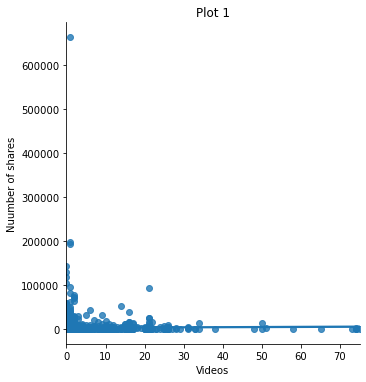

In [20]:
#plt.scatter(x,y)
#plt.title("Plot 1")
#plt.plot(x, y_pred_1, color='red')
#plt.xlabel("Number of videos on the channel")
#plt.ylabel("Number of shares")
#plt.show()
sns.lmplot(x='num_videos', y='shares', data=data_test)
plt.title('Plot 1')
plt.xlabel("Videos")
plt.ylabel("Nuumber of shares")
plt.show()


In [ ]:
print(linreg_1.coef_)

In [ ]:
print(linreg_1.intercept_) #y= 2x+3419.7 

For the second one we'll have a look at token title length and number f shares

In [ ]:
x = np.array(data_train['n_tokens_title']) 
y= np.array(data_train['shares'])

In [ ]:
linreg_2 = LinearRegression()

In [ ]:
x = x.reshape(-1,1)

In [ ]:
linreg_2.fit(x,y)

In [ ]:
y_pred= linreg_2.predict(x)

In [ ]:
plt.scatter(x,y)
plt.title("Plot 2")
plt.plot(x, y_pred, color='green')
plt.xlabel("Lenght of Title")
plt.ylabel("Number of Shares")
plt.show()

In [ ]:
print(linreg_2.coef_)

In [ ]:
print(linreg_2.intercept_)

In [ ]:
r2_score(dataceite['n_tokens_title'], dataceite['shares_p'])

In [ ]:
dataceite.columns #just easier to copy paste the column names to avoid mistakes

In [ ]:
x = np.array(data_train['num_imgs'])
y = np.array(data_train['shares'])

In [ ]:
linreg_3 = LinearRegression()

In [ ]:
x = x.reshape(-1,1)

In [ ]:
linreg_3.fit(x,y)

In [ ]:
y_pred= linreg_3.predict(x)

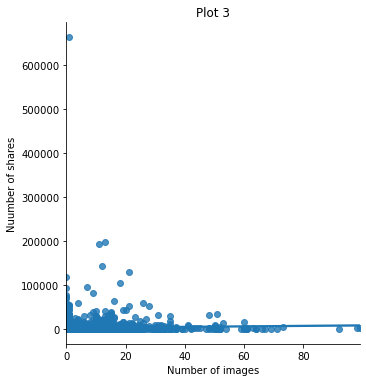

In [22]:
#plt.scatter(x,y)
#plt.title("Plot 3")
#plt.plot(x, y_pred, color='orange')
#plt.xlabel("Number of Images")
#plt.ylabel("Number of Shares")
#plt.show()
sns.lmplot(x='num_imgs', y='shares', data=data_test)
plt.title('Plot 3')
plt.xlabel("Number of images")
plt.ylabel("Nuumber of shares")
plt.show()

Finally something that makes sense. or not

In [ ]:
print(linreg_3.coef_)

In [ ]:
print(linreg_3.intercept_)

In [ ]:
print(linreg_3.score(x, y))

In [40]:
dataceite

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,http://mashable.com/2013/09/25/parkinsons-spoon/,9,342,9,0,4.628655,0,0,0,...,0,0,0,0,0.448753,0.250524,0.642857,0.214286,8500,3.929419
24995,24996,http://mashable.com/2013/05/20/esquire-weekly-...,6,243,1,0,5.111111,0,0,1,...,0,0,0,0,0.418081,0.206035,0.000000,0.000000,675,2.829304
24996,24997,http://mashable.com/2014/07/13/google-world-cu...,11,1334,4,4,4.613943,0,1,0,...,0,0,1,1,0.486041,0.102557,0.288889,-0.155556,1500,3.176091
24997,24998,http://mashable.com/2013/01/17/thinkpad-chrome...,7,263,1,0,4.749049,0,0,0,...,0,0,0,0,0.627143,0.387381,0.000000,0.000000,817,2.912222


In [41]:
x = np.array(dataceite['num_imgs'])
x = x.reshape(-1,1)
y = np.array(dataceite['shares'])

In [42]:
lm = LinearRegression() #create a new (empty model)
lm.fit(x, y) #fit the model
dataceite['shares_p'] = lm.predict(x) #generate the predictions and add them to the dataframe

dataceite['resid'] = dataceite['shares'] - dataceite['shares_p'] #get the residuals by subtracting the prediction from the actual views


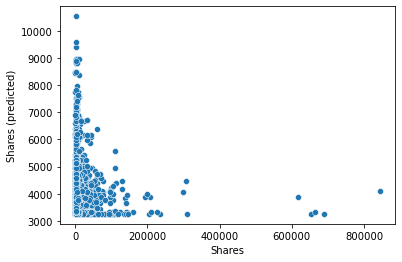

In [62]:
sns.scatterplot(x='shares',y='shares_p',data=dataceite)
#plt.xlim(0, 50) #This sets the x-axis limits to (0, 5e10 = 5000000000)
#plt.ylim(0, 50) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
#plt.plot([0, 25], [0, 25], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Shares')
plt.ylabel('Shares (predicted)')
plt.show()

In [56]:
print(lm.coef_)

[56.94066348]


In [57]:
print(lm.intercept_)

3255.54436491677


In [59]:
r2_score(dataceite['shares'], dataceite['shares_p'])

0.001398349089724582